In [24]:
from skimage import data
from skimage.viewer import ImageViewer
from skimage.viewer.canvastools import RectangleTool
from skimage.draw import line
from skimage.draw import set_color
import numpy as np

image = data.camera()
viewer = ImageViewer(image)
# doing this for top-bar compatability : )
def replace_show(self=viewer,x=50,y=50):
    self.move(x, y)
    for p in self.plugins:
        p.show()
    super(ImageViewer, self).show()
    self.activateWindow()
    self.raise_()
viewer._show = replace_show
def print_the_rect(extents):
    # x0, x1, y0, y1 = extents
    print(extents)

rect_tool = RectangleTool(viewer, on_enter=print_the_rect,on_release=) 
viewer.show()



(192.53781512605045, 409.81512605042019, 96.806722689075627, 265.68067226890759)
(36.571428571428598, 489.41176470588238, 48.403361344537814, 319.46218487394958)
(151.66386554621852, 256.0, 67.764705882352985, 190.38655462184875)
(244.16806722689077, 366.78991596638656, 107.56302521008405, 198.99159663865549)
(72.067226890756331, 394.75630252100842, 47.327731092436977, 378.62184873949582)


[]

In [35]:
from skimage.viewer.widgets import Slider
from skimage.viewer.plugins import PlotPlugin
plugin = PlotPlugin() 
def _on_new_image(self=plugin, image=None):
    

    self.ax.set_title('Color Histogram')
    self.ax.set_xlabel('b')
    self.ax.set_ylabel('a')
image = data.coins()
viewer = ImageViewer(image) 
viewer += plugin                  
thresholded = viewer.show()

In [1]:
from tile_select import TileViewer, TilePreview

In [50]:
image = data.camera()
image.shape
test_copy = np.zeros(image.shape)

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt


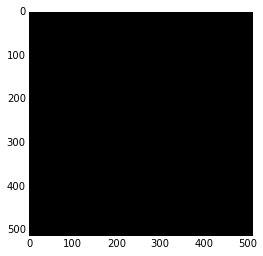

In [45]:
plt.imshow(test_copy,cmap='gray')

In [46]:
def blit(dest, src, loc):
    pos = [i if i >= 0 else None for i in loc]
    neg = [-i if i < 0 else None for i in loc]
    target = dest[[slice(i,None) for i in pos]]
    src = src[[slice(i, j) for i,j in zip(neg, target.shape)]]
    target[[slice(None, i) for i in src.shape]] = src
    return dest

In [57]:
def copy_tile(source_img,extents):
    x0, x1, y0, y1 = np.int64(extents)
    dest = np.zeros(image.shape)
    src_w, src_h = source_img.shape[:2]
    tile_w, tile_h = x1 - x0, y1 - y0
    w_offset = src_w % tile_w
    h_offset = src_h % tile_h
    for w in range(0,src_w // tile_w + 2):
        for h in range(0,src_h // tile_h + 2):
            blit(dest,source_img[y0:y1,x0:x1],(h*tile_h-h_offset,w*tile_w-w_offset))
    return dest
        
    

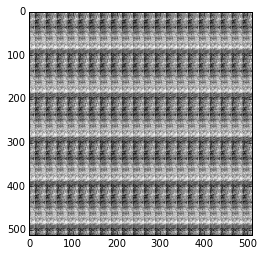

In [58]:
test_tile = copy_tile(image,(50,75,0,100))
plt.imshow(test_tile,cmap='gray')

In [ ]:
# file prep
#!ffmpeg -i ./cr.mkv_excerpt_000.mkv
#     Stream #0:0: Video: h264 (High), yuvj420p, 1920x1080 [SAR 1:1 DAR 16:9], 23.98 fps, 23.98 tbr, 1k tbn, 47.95 tbc (default)
!ffmpeg -i ./cr.mkv_excerpt_000.mkv -r 23.98 -q:v 2 -vf scale=-1:720 ./frames/img-%d.jpeg
    # resize to 720p ???

In [3]:
from skimage import data, io
from skimage.viewer import ImageViewer
from skimage.viewer.plugins import PlotPlugin
from skimage.viewer.canvastools import RectangleTool
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [7]:
start_frame = io.imread('./test2.jpg')

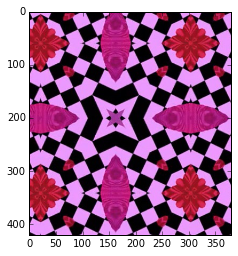

In [11]:
plt.imshow(start_frame[300:720,900:1280])

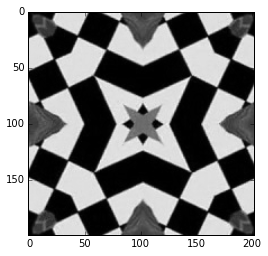

In [39]:
inner_square = start_frame[400:600,960:1162]
plt.imshow(inner_square,cmap='gray')

In [36]:
def check_symmetry(img):
    """
    checks if outside border is equal on both sides
    """
    west_side = img[:,0]
    east_side = img[:,-1]
    north_side = img[0,:]
    south_side = img[-1,:]
    return (west_side,east_side, north_side, south_side)

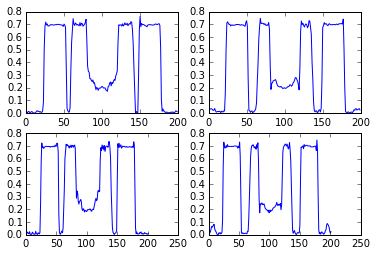

In [46]:
from skimage import img_as_float

start_frame = io.imread('./test2.jpg',as_grey=True)
start_frame = img_as_float(start_frame)
inner_square = start_frame[400:600,960:1162]
wens = check_symmetry(inner_square)
plt.subplot(2,2,1)
plt.plot(wens[0])
plt.subplot(2,2,2)
plt.plot(wens[1])
plt.subplot(2,2,3)
plt.plot(wens[2])
plt.subplot(2,2,4)
plt.plot(wens[3])

In [40]:
def rmse(a):
    return np.sqrt(np.mean((a[0]-a[1])**2))

In [97]:
# start at some point in middle
# then gradually increase scope within some radius
# until find minimum diff in edges around?
start_point = (500,1062)
radius = 25
# let's try just w/e for now
(y_0, x_0) = start_point
store_res = np.zeros([radius,radius])
for i in range(1,radius+1):
    for j in range(1, radius+1):
        check = check_symmetry(start_frame[y_0-100:y_0+100,x_0-i:x_0+j])
        store_res[i-1,j-1] = rmse(check)

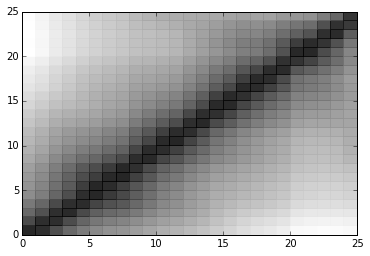

In [98]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(store_res,cmap='gray', alpha=0.85)
# ax.set_yticks(np.arange(store_res.shape[0])+0.5, minor=False)
# ax.set_xticks(np.arange(store_res.shape[1])+0.5, minor=False)
plt.show()

we've found the center once the rsme is 0 (dark) across the line in the middle >:)

in order to duplicate this result i shifted over the center by however much the line was offset to begin with

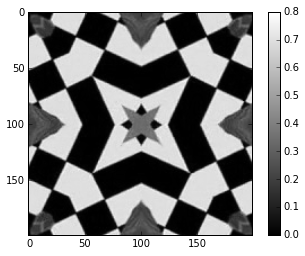

In [100]:
plt.imshow(start_frame[y_0-100:y_0+99,x_0-100:x_0+99],cmap='gray')
plt.colorbar()

now find size of tile

which is same as finding one coord of next center

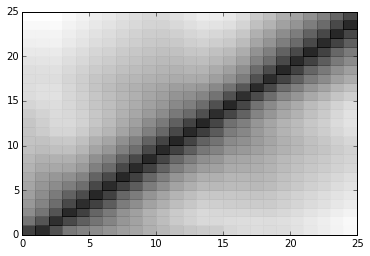

In [114]:
start_point = (641,1062)
radius = 25
# let's try just w/e for now
(y_0, x_0) = start_point
store_res = np.zeros([radius,radius])
for i in range(1,radius+1):
    for j in range(1, radius+1):
        check = check_symmetry(start_frame[y_0-i:y_0+j,x_0-100:x_0+100])
        store_res[i-1,j-1] = rmse(check[2:])
fig, ax = plt.subplots()
heatmap = ax.pcolor(store_res,cmap='gray', alpha=0.85)
plt.show()

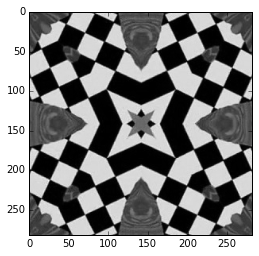

In [118]:
start_point = (500,1062)
(y_0, x_0) = start_point
tile_radius = 141
plt.imshow(start_frame[y_0-tile_radius:y_0+tile_radius,x_0-tile_radius:x_0+tile_radius],cmap='gray')


In [3]:
from skimage import data, io
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


In [4]:
i = 1
img = io.imread('./frames/out/{}.png'.format(i))
y_0, x_0 = 141,141
tile_radius = 141

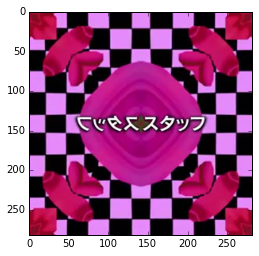

In [18]:
plt.imshow(img)

(282, 140, 3) (282, 140, 3)


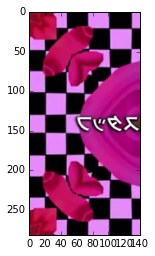

In [17]:

print(np.shape(img[:,:140]),np.shape(img[:,:141:-1]))
img[:,:140] = img[:,:141:-1]
plt.imshow(img[:,:141])

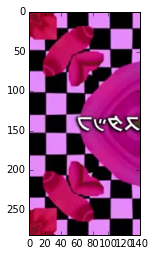

In [11]:
plt.imshow(img[:,:141:-1])

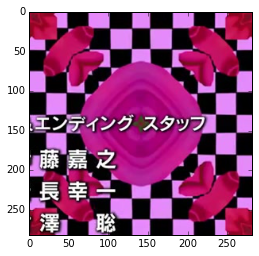

In [20]:
img = io.imread('./frames/img-12.jpeg')
y_0, x_0 = 500,1062
tile_radius = 141
plt.imshow(img[y_0-tile_radius:y_0+tile_radius,x_0-tile_radius:x_0+tile_radius],cmap='gray')

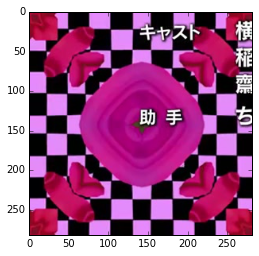

In [22]:
y_0, x_0 = 500,1062
tile_radius = 141
y_0 -= 2*tile_radius
x_0 -= 2*tile_radius
plt.imshow(img[y_0-tile_radius:y_0+tile_radius,x_0-tile_radius:x_0+tile_radius],cmap='gray')

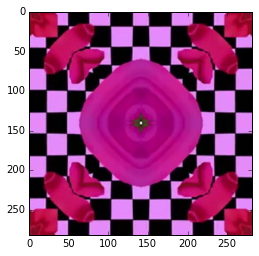

In [30]:
crop = img[y_0-tile_radius:y_0+tile_radius,x_0-tile_radius:x_0+tile_radius]
crop[:,:141:-1] = crop[:,:140]
crop[:140,:] = crop[:141:-1,:]
plt.imshow(crop)


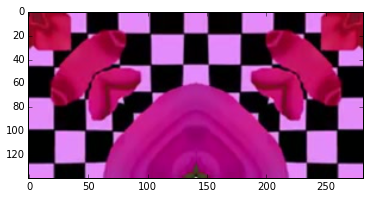

In [29]:
plt.imshow(crop[:141:-1,:])
